# <center> E-commerce Business Analysis </center>

## Problem Statement:
A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on. The machine learning clustering algorithms can provide an analytical method to cluster customers with similar interests.

## Data Definition:
Input variables:

1) Cust_ID Unique numbering for customers

2) Gender: Gender of the customer

3) Orders: Number of orders placed by each customer in the past

Remaining 35 features contains the number of times customers have searched them

## Content

Import Packages

Read Data

Understand and Prepare the Data
3.1 - Data Types and Dimensions
3.2 - Distribution of Variables
3.3 - Statistical Summary
3.4 - Missing Data Treatment
3.5 - Visualization

K-means Clustering
4.1 - Prepare the data
4.2 - Build a Model with Multiple K

Retrieve the Clusters

Clusters Analysis
6.1 - Analysis of Cluster_1
6.2 - Analysis of Cluster_2
6.3 - Analysis of Cluster_3
6.4 - Analysis of Cluster_4
Conclusion

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [15,8]
import warnings
warnings.filterwarnings("ignore")

## Print Options

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)

## Read the Data

In [3]:
import os
os.chdir(r"D:\Imarticus\ML\Unsupervised learning\1-K -means clustering")
df = pd.read_excel("cust_data.xlsx",index_col =0 )
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


## Understand and Prepare the Data

The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

Here we will analyze and prepare data :
1. Check dimensions and data types of the dataframe
2. Study summary statistics
3. Check for missing values
4. Visualization
5. Study correlation

In [4]:
df.shape

(30000, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [6]:
df.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [7]:
df.describe(include = object)

,Gender
count,27276
unique,2
top,F
freq,22054


## Distribution of orders

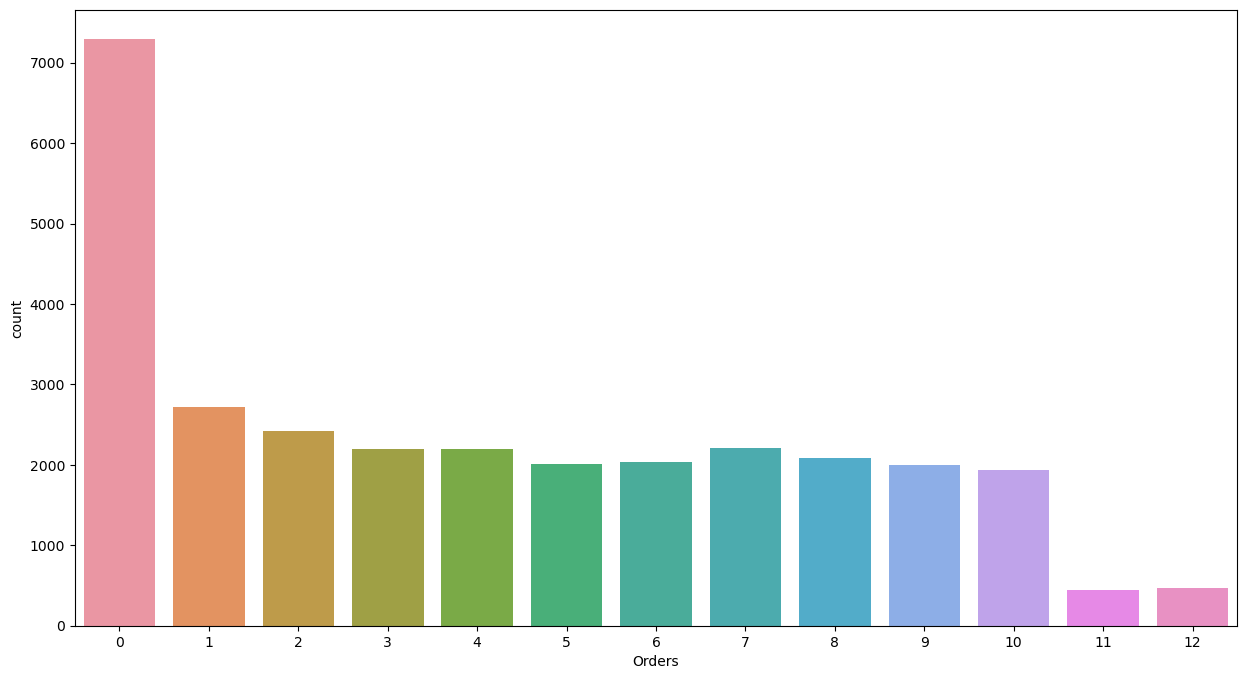

In [8]:
sns.countplot(df.Orders)
plt.show()

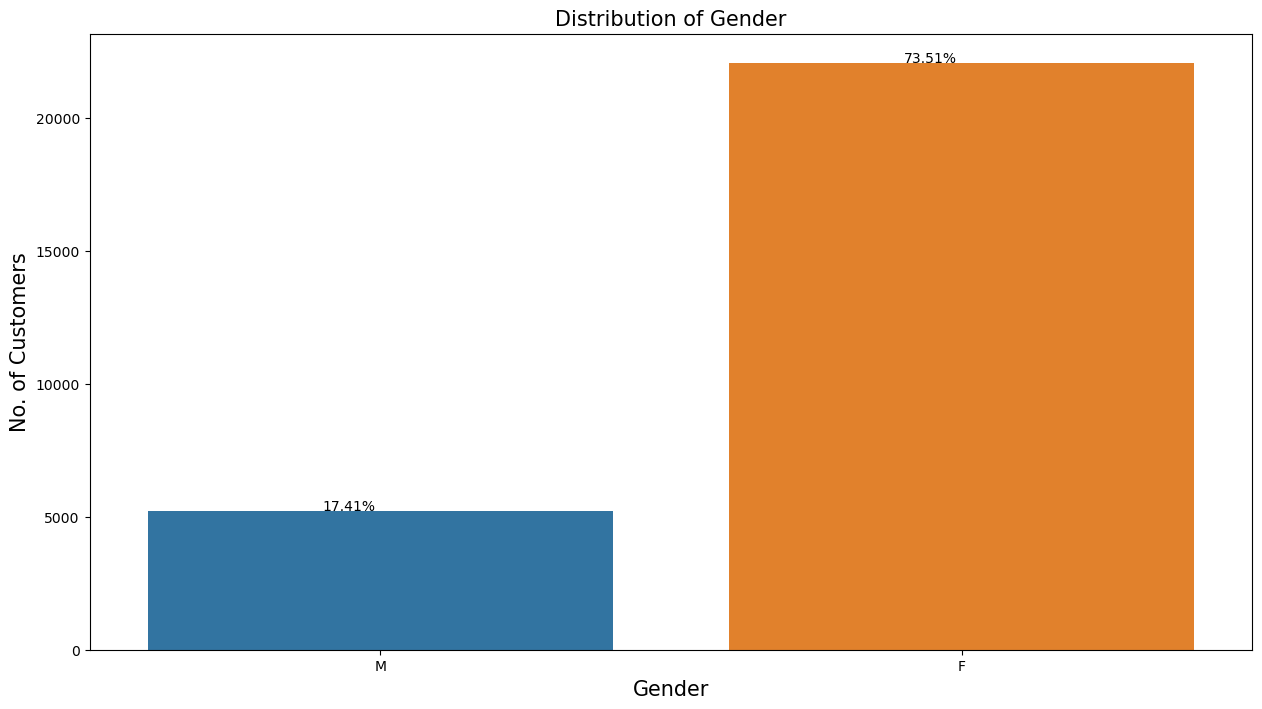

In [9]:
sns.countplot(df.Gender)
plt.title("Distribution of Gender",fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.ylabel("No. of Customers",fontsize = 15)
plt.text(x = -0.1, y = df.Gender.value_counts()[1] + 20,
         s = str(round((df.Gender.value_counts()[1])*100/len(df.Gender),2)) + '%')
plt.text(x = 0.9, y = df.Gender.value_counts()[0] + 20,
         s = str(round((df.Gender.value_counts()[0])*100/len(df.Gender),2)) + '%')
plt.show()


There are more female customers in the data than the male customers

It can be seen that the variable 'Gender' has lesser observations (percent-wise only 90.92% observations) than the total number of observations. This inconsistency is because of the existence of missing values; we deal with this issue in section 4.5

## Missing Values

In [10]:
Total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([Total,percent],axis = 1,keys = ["Total Null","Percent of Null"])
missing_data["Data Type"] = df[missing_data.index].dtypes
missing_data

,Total Null,Percent of Null,Data Type
Gender,2724,9.08,object
J.M. Smucker,0,0.00,int64
Juniper,0,0.00,int64
Huawei,0,0.00,int64
Compaq,0,0.00,int64
IBM,0,0.00,int64
Burberry,0,0.00,int64
Mi,0,0.00,int64
LG,0,0.00,int64
Dior,0,0.00,int64


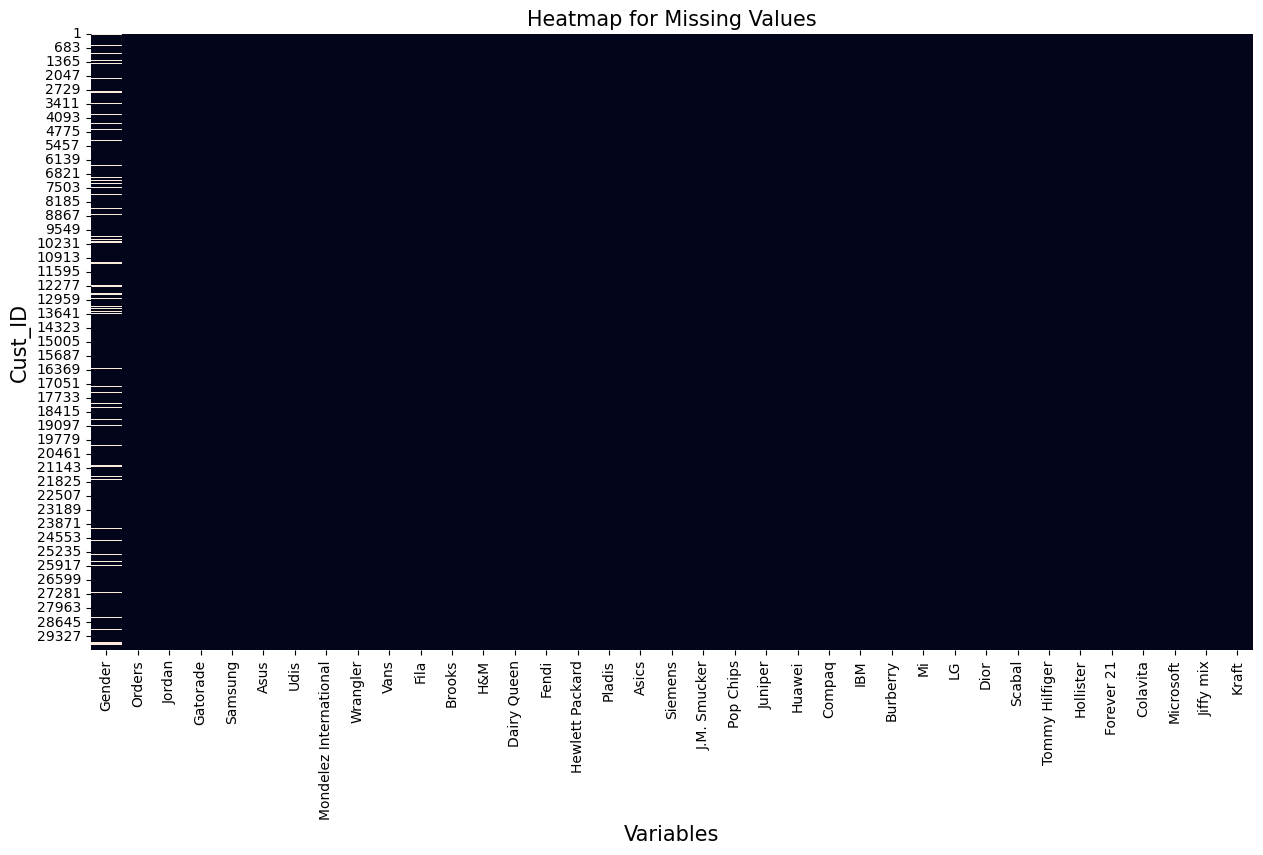

In [11]:
sns.heatmap(df.isnull(),cbar = False)
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Cust_ID', fontsize = 15)

plt.show()

In [12]:
data = pd.get_dummies(df,columns=['Gender'])     

data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0


In [13]:
data.shape

(30000, 38)

In [14]:
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

## Visualization

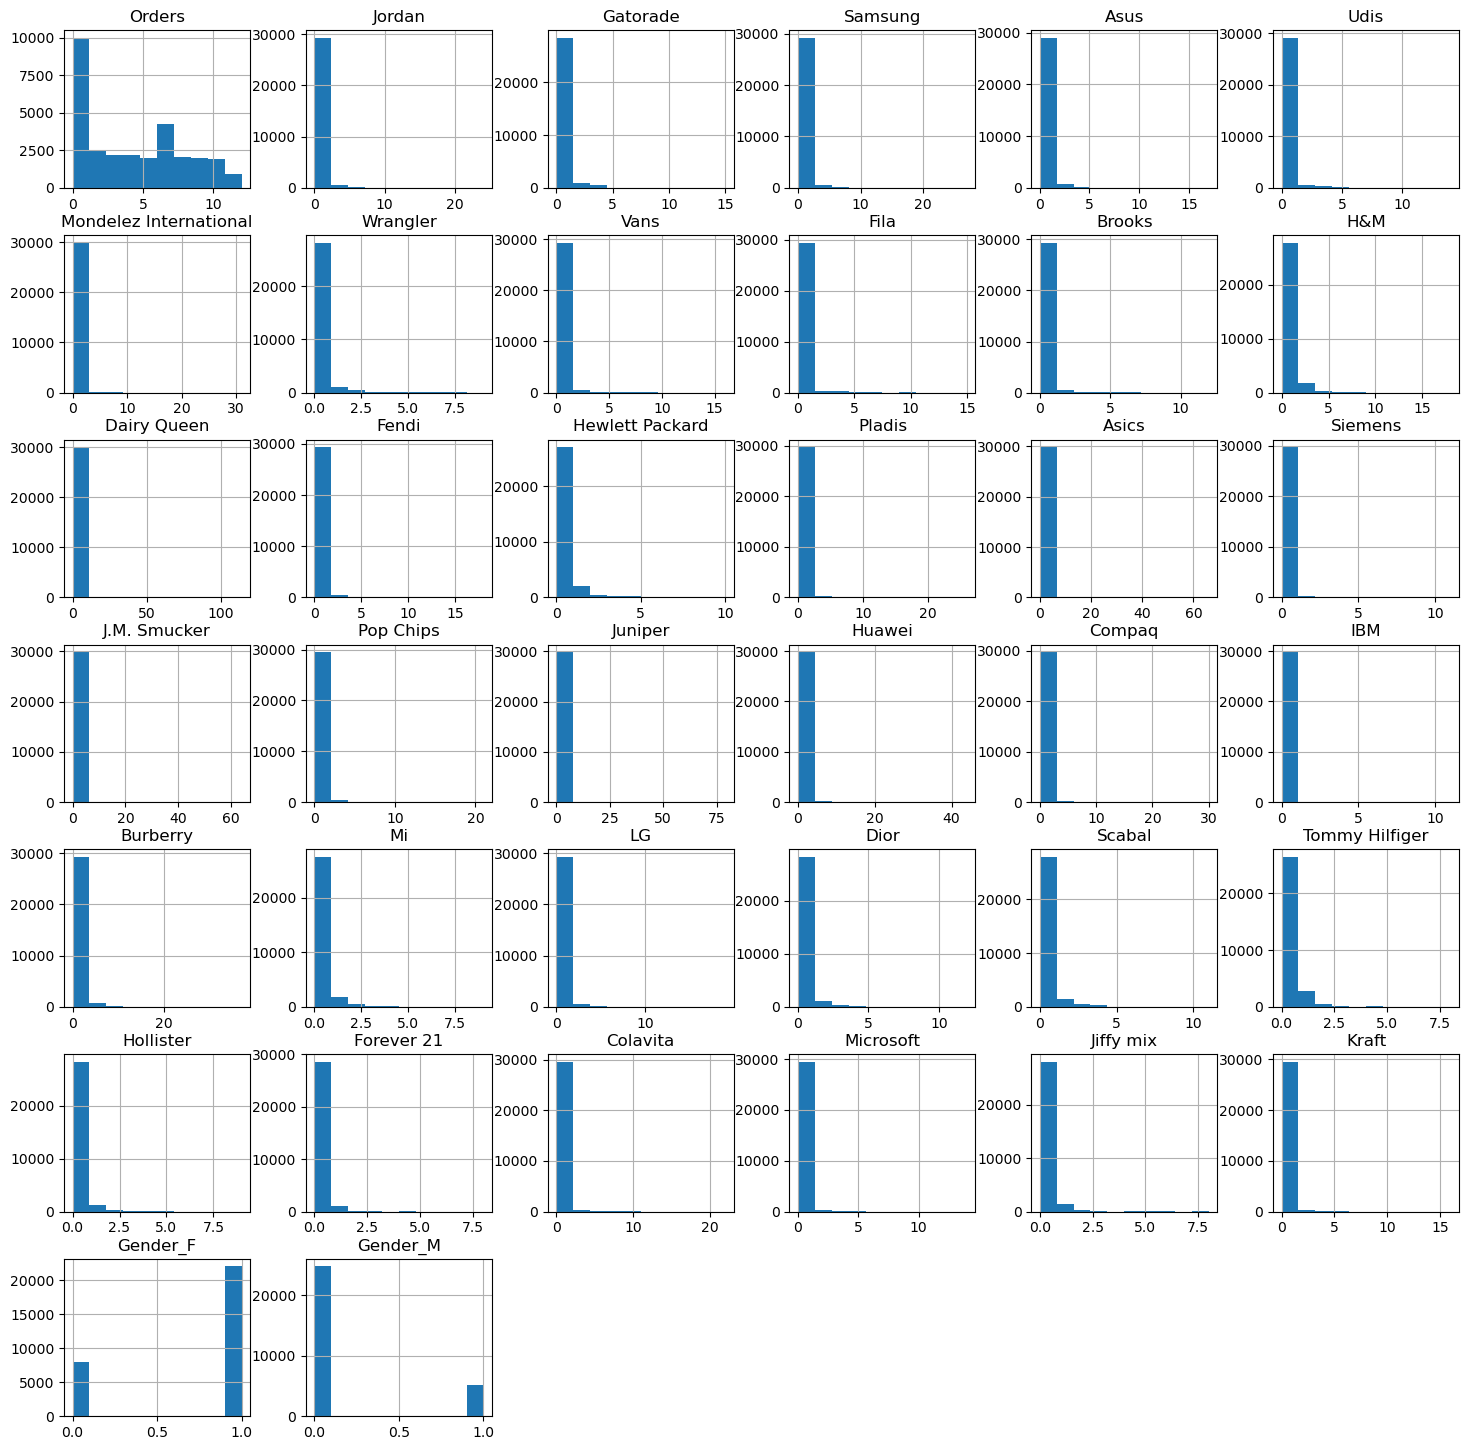

In [15]:
data.hist(figsize = (18,18))
plt.show()

## K- Means Cluster

Prepare the Data

Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result.

The two most discussed scaling methods are normalization and standardization.

In [16]:
features = data.drop(["Orders","Gender_F","Gender_M"], axis = 1)
features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = StandardScaler().fit(features)       

# scale the 'features' data
features = scale.transform(features)                

In [19]:
features = scale.fit_transform(features)

In [20]:
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0


In [21]:
features_scaled = pd.DataFrame(features,columns = data.columns[1:36])
features_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.707974,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


## Building a model with Multiple K
We build our models using the silhouette score method. The silhouette is a method of interpretation and validation of consistency within clusters of data

We do not know how many clusters give the most useful results. So, we create the clusters varying K, from 4 to 8 and then decide the optimum number of clusters (K) with the help of the silhouette score

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [4,5,6,7,8] # create a list for different values of K

for K in n_clusters :
    cluster = KMeans(n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {}".format(K, score))

For n_clusters = 4, silhouette score is 0.28882936660517466
For n_clusters = 5, silhouette score is 0.27345077326450096
For n_clusters = 6, silhouette score is 0.2194573352058987
For n_clusters = 7, silhouette score is 0.20381188273498219
For n_clusters = 8, silhouette score is 0.19969011593389388


The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 4, the silhouette score is highest. Thus, we build the clusters with K = 4

In [23]:
model = KMeans(n_clusters= 4, random_state= 10)

# fit the model
model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

## Retrive the Clusters

	
As we have built the 4 clusters, now we want to know which customers belong to which cluster. 'model.labels_' can give the cluster number in which the customer belongs

In [24]:
data_output = data.copy(deep = True)
data_output["Cluster"] = model.labels_
data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0,0


**We have added a column 'cluster' in the dataframe describing the cluster number for each observation**

In [25]:
np.unique(model.labels_, return_counts=True)                

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

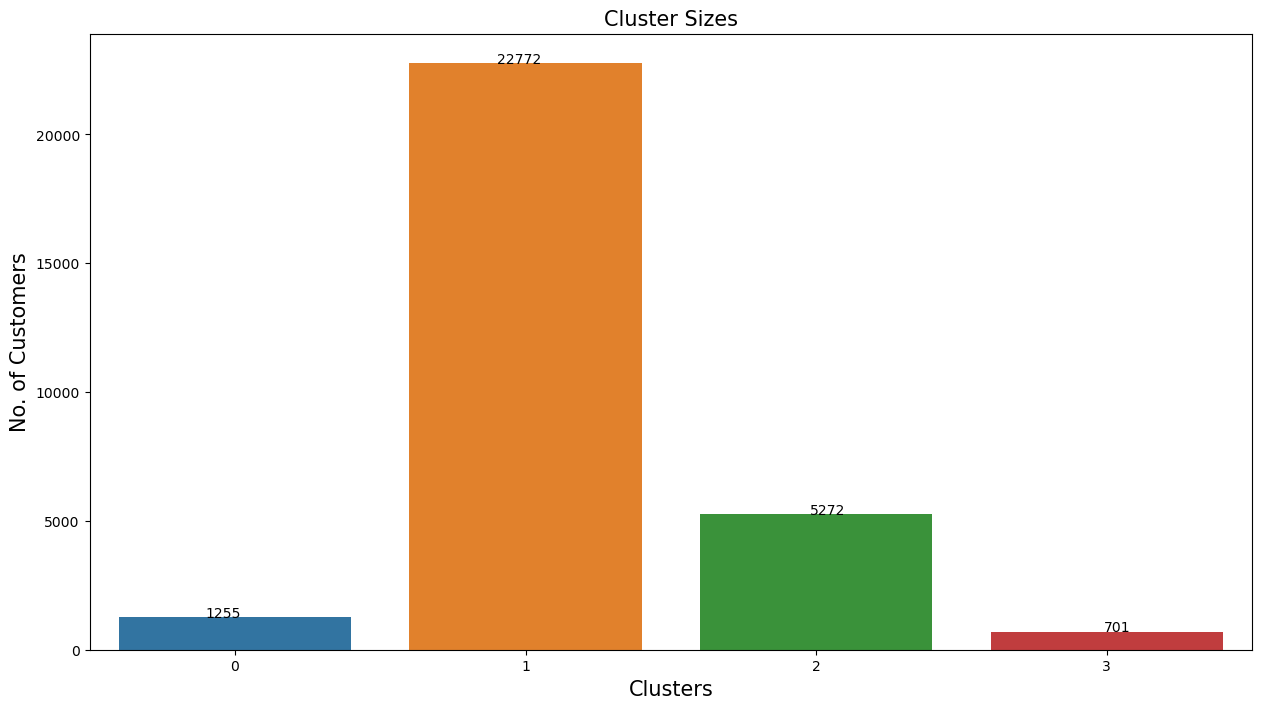

In [43]:
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.1, y =1255, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =22772, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.98, y =5272, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.99, y =701, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

In [44]:
centers = pd.DataFrame(model.cluster_centers_, columns=  data_output.columns[1:36])      

In [45]:
centers.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,0.625607,1.907329,0.616519,0.225042,2.568363,0.365394,-0.024283,1.207535,1.386412,0.361136,0.139219,0.106599,0.032785,2.556671,0.447053,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,-0.158799,-0.091024,-0.068992,-0.055305,-0.123492,-0.120399,-0.114161,-0.112618,-0.095141,-0.087916,-0.126187,-0.056312,-0.017300,-0.185835,-0.094772,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,0.543847,-0.050482,0.153836,0.199526,-0.067101,-0.066405,-0.114408,0.149411,0.065418,0.285404,0.504460,0.214274,0.067360,0.206156,0.298087,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,-0.042512,-0.077589,-0.016627,-0.103615,-0.081134,3.757106,4.612421,0.376242,0.118643,0.067765,0.064143,0.030423,-0.002204,-0.085748,0.041534,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


**Now, extract the variables in each of the clusters and try to name each of the cluster based on the variables**

## Cluster Analysis
	
Here we analyze the first cluster:

1. Check the size of a cluster
2. Sort the variables belonging to the cluster
3. Compute the statistical summary for observations in the cluster

Sort all the variables based on value for the cluster center (i.e., the variable with the highest value of the cluster center will be on top of the sorted list) and store the first ten variables as a list

In [46]:
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)),reverse = True)[:10]

In [47]:
np.unique(model.labels_, return_counts=True)[1][0]

1255

In [48]:
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [49]:
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 0].describe()

,Orders,Gender_F,Gender_M,Cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


## Cluster 2
Here we analyze the second cluster:

1. Check the size of a cluster
2. Sort the variables belonging to the cluster
3. Compute the statistical summary for observations in the cluster

In [50]:
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:10]     

In [51]:
np.unique(model.labels_, return_counts=True)[1][1]

22772

In [52]:
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var  

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

In [53]:
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 1].describe()

,Orders,Gender_F,Gender_M,Cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


## Cluster 3

In [54]:
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse = True)[:10]   

In [55]:
np.unique(model.labels_, return_counts=True)[1][2]

5272

In [56]:
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var             

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

In [57]:
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 2].describe()

,Orders,Gender_F,Gender_M,Cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


## Cluster 4

In [58]:
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]   

In [59]:
np.unique(model.labels_, return_counts=True)[1][3]

701

In [60]:
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var  

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

In [61]:
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster==3].describe()

,Orders,Gender_F,Gender_M,Cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.708987,0.209700,3.0
std,3.522693,0.454554,0.407385,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0
